## Getting number of texts in arXiv database in total

In [27]:
import json
import os

def count_texts_in_jsonl_files(folder_path):
    total_texts = 0

    # Iterate over all files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.jsonl'):
            file_path = os.path.join(folder_path, file_name)

            # Open and read the JSONL file
            with open(file_path, 'r', encoding='utf-8') as file:
                for line in file:
                    try:
                        # Attempt to load each line as a JSON object
                        json.loads(line)
                        total_texts += 1
                    except json.JSONDecodeError:
                        # Skip the line if it's not a valid JSON object
                        continue

    return total_texts

# Specify the path to the folder containing your JSONL files
input_folder_path = '../../LLM_Bias/arxiv_data/'

# Count the number of texts
num_texts = count_texts_in_jsonl_files(input_folder_path)
print(f"Total number of texts in JSONL files: {num_texts}")


Total number of texts in JSONL files: 1558306


### Checking Range of Timestamps for the arXiv database

In [2]:
import json
import os
from datetime import datetime

def get_timestamp_range(folder_path):
    timestamps = []

    # Iterate over all files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.jsonl'):
            file_path = os.path.join(folder_path, file_name)

            # Open and read the JSONL file
            with open(file_path, 'r', encoding='utf-8') as file:
                for line in file:
                    try:
                        # Load each line as a JSON object
                        data = json.loads(line)
                        meta = data.get('meta', {})
                        timestamp_str = meta.get('timestamp')
                        if timestamp_str:
                            # Parse the timestamp string into a datetime object
                            timestamp = datetime.strptime(timestamp_str, '%Y-%m-%dT%H:%M:%S')
                            timestamps.append(timestamp)
                    except (json.JSONDecodeError, ValueError) as e:
                        print(f"Error processing line: {e}")
                        continue

    # Sort the timestamps to find the first and last dates
    if timestamps:
        timestamps.sort()
        first_date = timestamps[0]
        last_date = timestamps[-1]
        return first_date, last_date
    else:
        return None, None

# Specify the path to the folder containing your JSONL files
input_folder_path = '../../LLM_Bias/arxiv_data/'

# Retrieve the first and last timestamps
first_timestamp, last_timestamp = get_timestamp_range(input_folder_path)

if first_timestamp and last_timestamp:
    print(f"First timestamp: {first_timestamp}")
    print(f"Last timestamp: {last_timestamp}")
else:
    print("No timestamps found in the data.")


First timestamp: 1991-08-21 03:40:51
Last timestamp: 2023-03-07 02:32:27


### Visualizing articles over time in the arXiv database

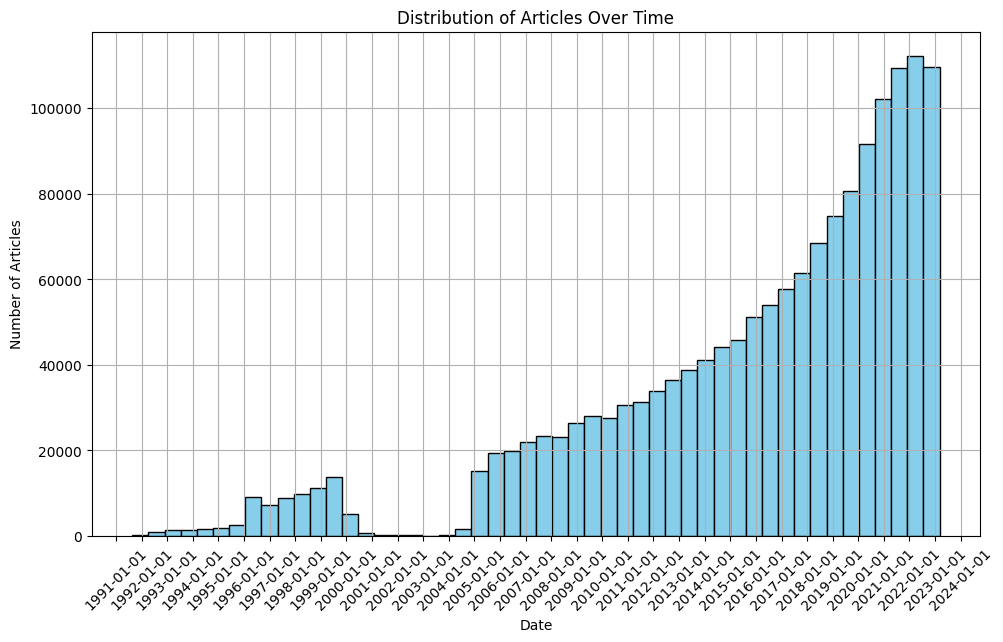

In [1]:
import json
import os
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates

def collect_timestamps(folder_path):
    timestamps = []

    # Iterate over all files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.jsonl'):
            file_path = os.path.join(folder_path, file_name)

            # Open and read the JSONL file
            with open(file_path, 'r', encoding='utf-8') as file:
                for line in file:
                    try:
                        # Load each line as a JSON object
                        data = json.loads(line)
                        meta = data.get('meta', {})
                        timestamp_str = meta.get('timestamp')
                        if timestamp_str:
                            # Assuming the timestamp format is like '2019-04-30T02:17:30'
                            timestamp = datetime.strptime(timestamp_str, '%Y-%m-%dT%H:%M:%S')
                            timestamps.append(timestamp)
                    except (json.JSONDecodeError, ValueError) as e:
                        print(f"Error processing line: {e}")
                        continue

    return timestamps

def plot_timestamps_distribution(timestamps):
    dates = matplotlib.dates.date2num(timestamps)

    plt.figure(figsize=(10, 6))
    plt.hist(dates, bins=50, color='skyblue', edgecolor='black')
    plt.title('Distribution of Articles Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Articles')
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(matplotlib.dates.YearLocator())
    plt.show()

# Specify the path to the folder containing your JSONL files
input_folder_path = '../../LLM_Bias/arxiv_data/'

# Collect all timestamps
timestamps = collect_timestamps(input_folder_path)

# Plot the distribution if there are any timestamps
if timestamps:
    plot_timestamps_distribution(timestamps)
else:
    print("No timestamps found in the data.")